# Mall Customers Clustering Using K-means algorithm in Python.



<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rakaadi/MallCustomersClustering/blob/master/Customers_clustering.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/rakaadi/MallCustomersClustering/blob/master/Customers_clustering.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [0]:
from sklearn.cluster import KMeans

import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import plotly.graph_objects as go

import sys
print("Python", sys.version)

Python 3.8.2 | packaged by conda-forge | (default, Apr 24 2020, 07:34:03) [MSC v.1916 64 bit (AMD64)]


## The Mall Customers Dataset

In [0]:
data = pd.read_csv("./Mall_Customers_.csv", index_col=0)
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [0]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


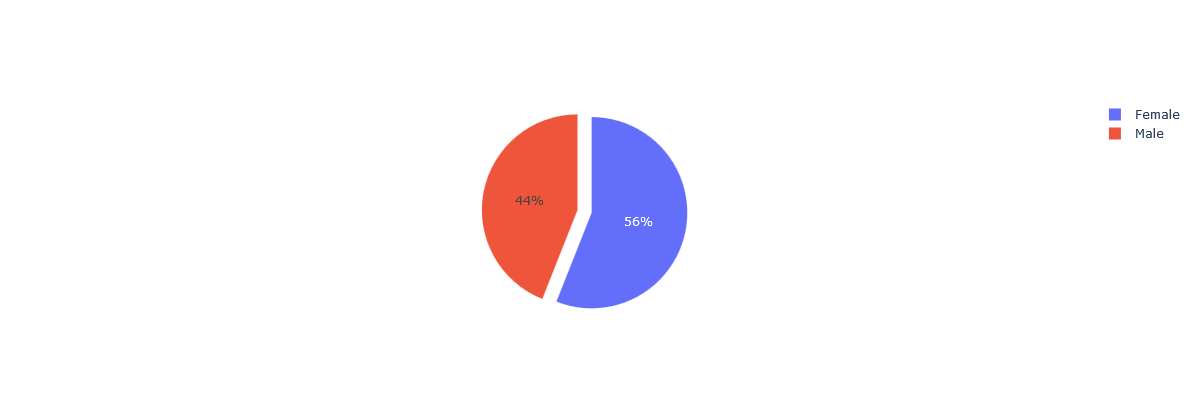

In [0]:
ge_count = data["Gender"].value_counts()
ge_labels = ["Female", "Male"]

# plt.figure(figsize=(6, 6))
# plt.pie(ge_count, labels=ge_labels, explode=[0, 0.1], autopct="%.2f%%")
# plt.title("Gender", fontsize=20)
# plt.axis("off")
# plt.show()

fig1 = go.Figure(data=[go.Pie(
    labels=ge_labels,
    values=ge_count,
    pull=[0.15]
)])

fig1.update_layout(width=500, height=400)
fig1.show(renderer="plotly_mimetype")

    By looking at the above pie chart which explains about the distribution of Gender in the Mall.
    
        Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%.

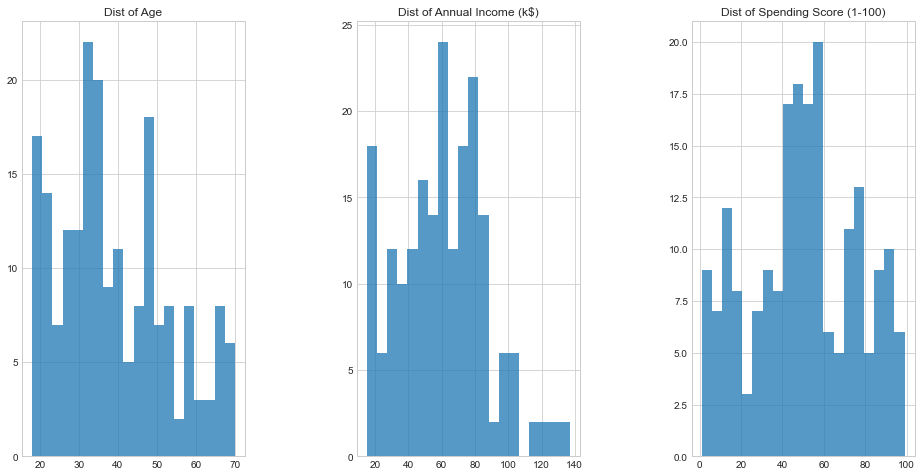

In [0]:
plt.figure(1, figsize=(16, 8))
n = 0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.hist(data[x], bins=20, alpha=0.75)
    plt.title("Dist of {}".format(x))
plt.show()

    Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,
    
    Taking inferences about the Customers.

        The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters also compared less in number to the Middle aged people
        
        we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.
        
    About the spending score.
    
        On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. The distribution of the spending score, detailed distribution in graph below, also indicating that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

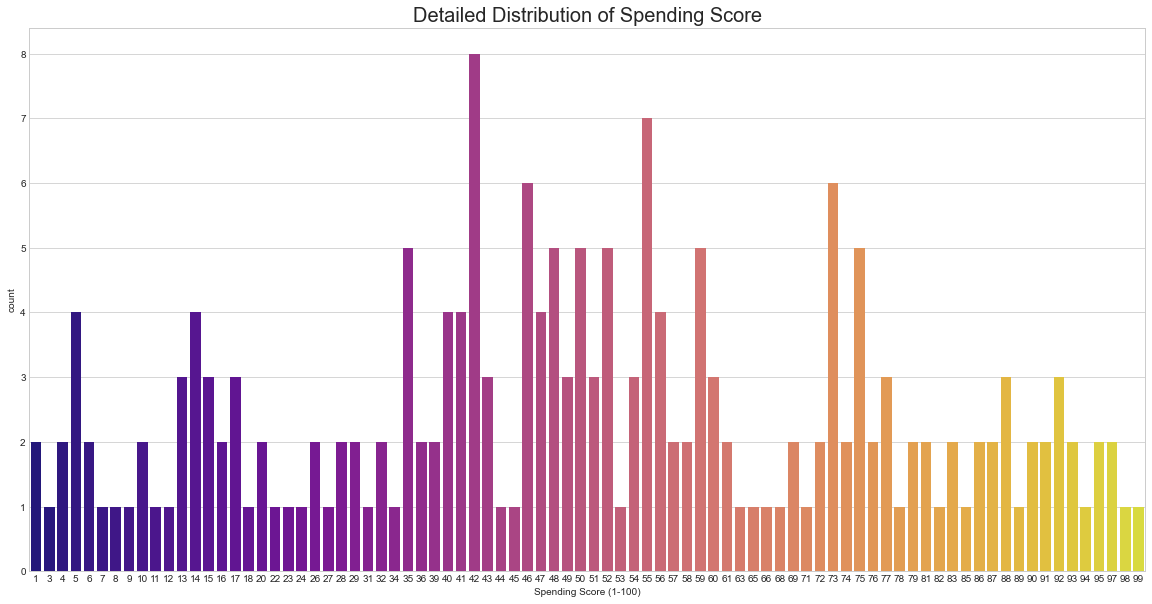

In [0]:
plt.figure(figsize=(20, 10))
sns.countplot(data["Spending Score (1-100)"], palette="plasma")
plt.title("Detailed Distribution of Spending Score", size=20)
plt.show()

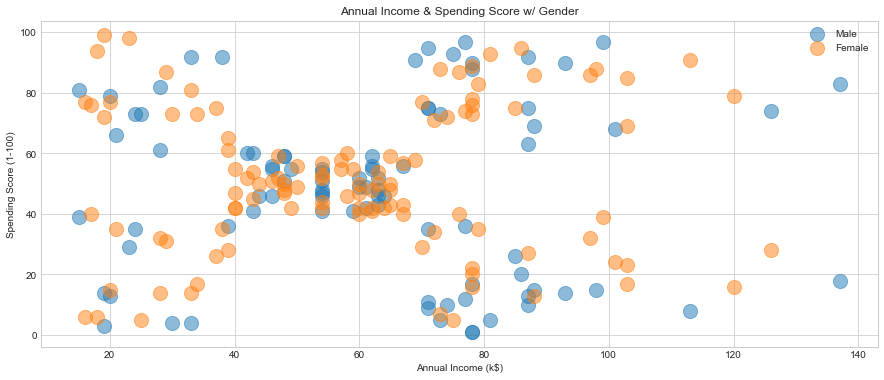

In [0]:
plt.figure(1, figsize=(15, 6))
for gender in ["Male", "Female"]:
    plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)",
                data=data[data["Gender"] == gender],
                s=200, alpha=0.5, label=gender)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income & Spending Score w/ Gender")
plt.legend()
plt.show()

    From this we can see that both gender appear to be distributed evenly regardless of spending score and annual income.

## KMeans Clustering

We will do three segmentation, and will use a different parameters for each segmentation. 
- First segmentation, using Age and Spending Score
- Second segmentation, using Annual Income and Spending Score
- Third segmentation, using Age, Annual Income and Spending Score

### Clustering using Age and Spending Score

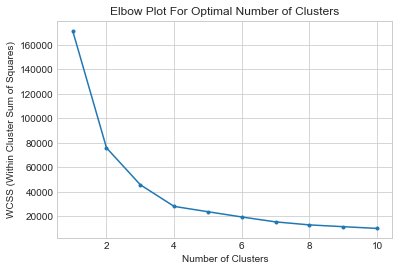

In [0]:
customers1 = data[["Age", "Spending Score (1-100)"]].iloc[:, :].values

# Using the elbow method to find the optimal number of clusters
# Within Cluster Sum of Square
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++",
                    random_state=42, algorithm="elkan")
    kmeans.fit(customers1)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS, marker=".")
plt.title('Elbow Plot For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [0]:
# Selecting 4 cluster based in Inertia
clustering1 = KMeans(n_clusters=4,
                     init="k-means++",
                     n_init=10,
                     algorithm="elkan",
                     random_state=42)
clustering1.fit(customers1)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
centers = clustering1.cluster_centers_
centers

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

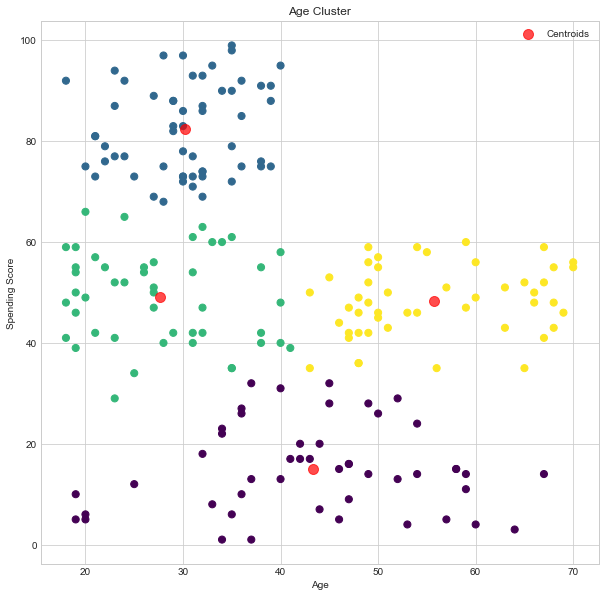

In [0]:
# Displaying Data in 4 Cluster Form
plt.figure(figsize=(10, 10))

plt.scatter(data["Age"],
            data["Spending Score (1-100)"],
            c=clustering1.labels_, s=50, cmap="viridis")

plt.scatter(centers[:, 0], centers[:, 1],
            color="red", marker=".", s=400, alpha=0.7, label="Centroids")

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age Cluster")
plt.legend()
plt.show()

    From the graph above it is save to conclude that the customers spending score directly correspond to their age. The younger age customers tend to spend more compared to the older age customers. This can be useful to determined the the marketing startegies and policy to optimize the customers spending score.

### Clustering using Annual Income and Spending Score

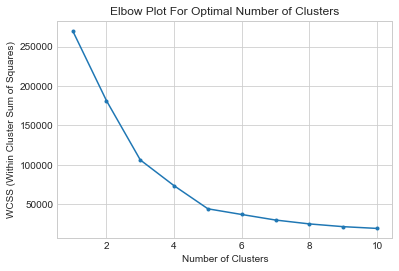

In [0]:
customers2 = data[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values

# Using the elbow method to find the optimal number of clusters
# Within Cluster Sum of Square
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", 
                    random_state=42, algorithm="elkan")
    kmeans.fit(customers2)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS, marker=".")
plt.title('Elbow Plot For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [0]:
# Selecting 5 cluster based on Inertia
clustering2 = KMeans(n_clusters=5,
                     init="k-means++",
                     n_init=10,
                     algorithm="elkan",
                     random_state=42)
clustering2.fit(customers2)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
centers = clustering2.cluster_centers_
centers

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

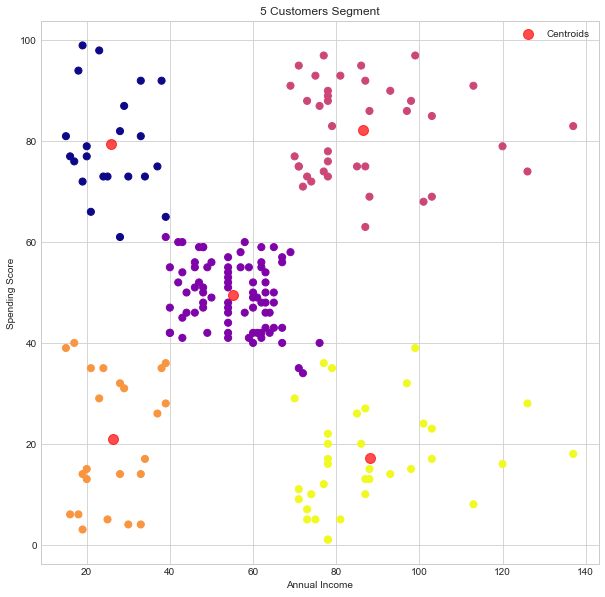

In [0]:
# Displaying Data in 5 Cluster Form
plt.figure(figsize=(10, 10))

plt.scatter(data["Annual Income (k$)"],
            data["Spending Score (1-100)"],
            c=clustering2.labels_, s=50, cmap="plasma")

plt.scatter(centers[:, 0], centers[:, 1],
            color="red", marker=".", s=400, alpha=0.7, label="Centroids")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("5 Customers Segment")
plt.legend()
plt.show()

    This clustering analysis give us more insight to customers segments that available in the mall. There are clearly five segments of customers in the mall.

### Segmentation using Age, Annual Income and Spending Score

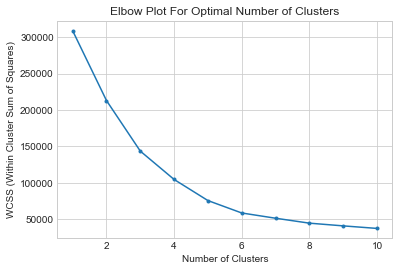

In [0]:
customers3 = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values

# Using the elbow method to find the optimal number of clusters
# Within Cluster Sum of Square
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", 
                    random_state=42, algorithm="elkan")
    kmeans.fit(customers3)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS, marker=".")
plt.title('Elbow Plot For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [0]:
# Selecting 6 cluster based in Inertia
clustering3 = KMeans(n_clusters=6,
                     init="k-means++",
                     n_init=10,
                     algorithm="elkan",
                     random_state=42)
clustering3.fit(customers3)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
centers = clustering3.cluster_centers_
centers

array([[44.14285714, 25.14285714, 19.52380952],
       [25.27272727, 25.72727273, 79.36363636],
       [41.68571429, 88.22857143, 17.28571429],
       [56.15555556, 53.37777778, 49.08888889],
       [32.69230769, 86.53846154, 82.12820513],
       [27.        , 56.65789474, 49.13157895]])

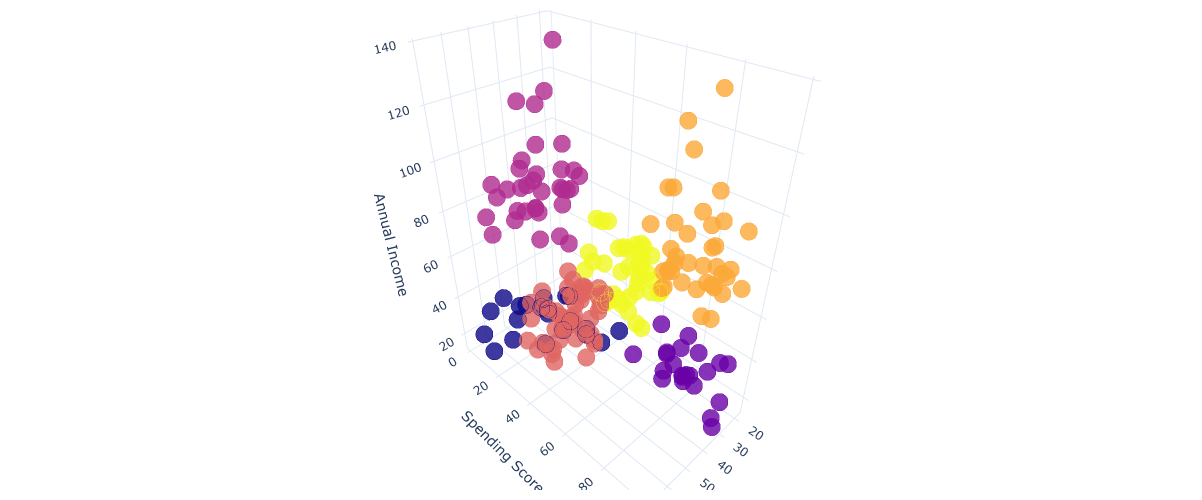

In [0]:
# Displaying Data in 6 Cluster Form
data["Labels"] = clustering3.labels_

trace = go.Scatter3d(
    x=data["Age"],
    y=data["Spending Score (1-100)"],
    z=data["Annual Income (k$)"],
    mode="markers",
    marker=dict(
        color=data['Labels'],
        size=10,
        line=dict(
            color=data['Labels'],
            width=12
        ),
        opacity=0.8
    ),
    hovertemplate="Age: %{x} <br>Spending Score: %{y} <br>Annual Income: %{z}(k$)"
)

df=[trace]

layout=go.Layout(
    margin=dict(l=10, r=20, b=10, t=10),
    scene = dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
        )
)

fig2=go.Figure(data=df, layout=layout)
fig2.update_layout(template="plotly_white", height=500)
fig2.show(renderer="plotly_mimetype")